In [2]:
from preprocess import proc
import freq
from freq import read_kw, word_list2freq_dict
from importlib import reload
import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
reload(freq)


def cross_validation(model, X, y, scorer, cv=5):
    return cross_validate(estimator=model,
                          X=X,
                          y=y,
                          cv=cv,
                          scoring=scorer,
                          return_train_score=True)


def scor(y, y_pred):
    t_pt = [i * j for i in y for j in y_pred]
    f_pf = [(1 - i) * (1 - j) for i in y for j in y_pred]
    return sum(t_pt) * sum(f_pf) / (sum(y_pred) * (len(y_pred) - sum(y_pred)))


kw = read_kw()

train = pd.read_csv("./train.csv")[['target', 'comment_text']][:200000]
test = pd.read_csv("./test.csv")[['comment_text']]
train['toxic'] = 1 * (train['target'] > 0.5)


def comment_text_to_vec(comment_text):
    p = proc(comment_text, [1, 2])
    return word_list2freq_dict(kw, p)


train["comment"] = train['comment_text'].apply(comment_text_to_vec)



0.22216112180368436
0.34674756848398325
0.9511933333333333
0.94342
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47085
           1       0.56      0.14      0.22      2915

    accuracy                           0.94     50000
   macro avg       0.75      0.57      0.60     50000
weighted avg       0.93      0.94      0.93     50000



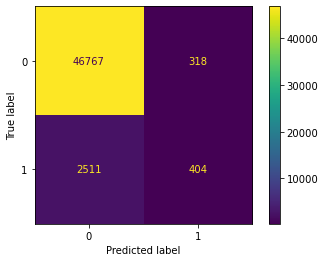

In [3]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.2905296950240771
0.31927763653896735
0.9482333333333334
0.94696
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47132
           1       0.62      0.19      0.29      2868

    accuracy                           0.95     50000
   macro avg       0.79      0.59      0.63     50000
weighted avg       0.93      0.95      0.93     50000



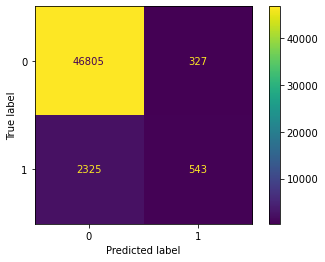

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=5, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.25822234302799674
0.375411080192259
0.95062
0.94542
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47215
           1       0.53      0.17      0.26      2785

    accuracy                           0.95     50000
   macro avg       0.74      0.58      0.61     50000
weighted avg       0.93      0.95      0.93     50000



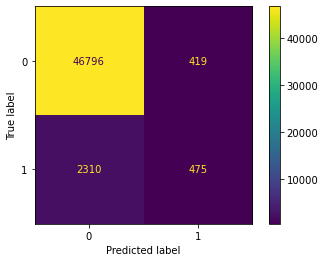

In [5]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=3, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.30874450415241816
0.34626676188209154
0.9450733333333333
0.9434
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     47185
           1       0.49      0.22      0.31      2815

    accuracy                           0.94     50000
   macro avg       0.72      0.61      0.64     50000
weighted avg       0.93      0.94      0.93     50000



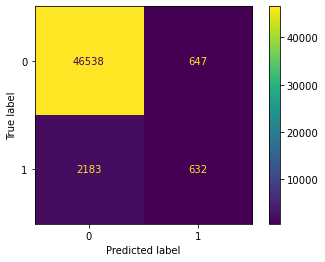

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=3, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

0.2763300760043431
0.39962006735169675
0.9536466666666666
0.94668
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     47153
           1       0.61      0.18      0.28      2847

    accuracy                           0.95     50000
   macro avg       0.78      0.59      0.62     50000
weighted avg       0.93      0.95      0.93     50000



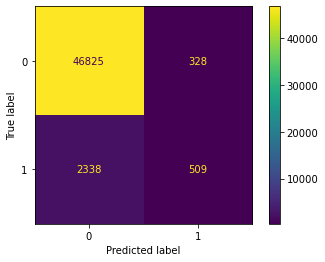

In [7]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=7, weights='distance')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train["comment"], train["toxic"])

X_train = np.stack(X_train)
X_test = np.stack(X_test)
scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

m = KNeighborsClassifier(n_neighbors=7, weights='uniform')
m.fit(Xs_train, y_train)
pred = m.predict(Xs_test)
pred_train = m.predict(Xs_train)

print(f1_score(y_test, pred))
print(f1_score(pred_train, y_train))
print(m.score(Xs_train, y_train))
print(m.score(Xs_test, y_test))
print(classification_report(y_test, pred))
plot_confusion_matrix(m, Xs_test, y_test)
plt.show()